In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#reading data
df  = pd.read_csv("C:/Users/hp/Desktop/insurance.csv")

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


c:\python 3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges', ylabel='bmi'>

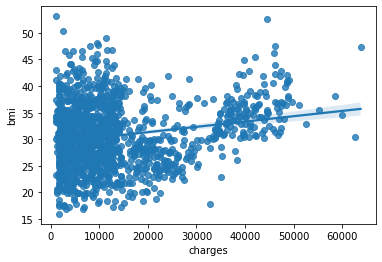

In [5]:
#scatterplot between dependent variable and independent variable
sns.regplot("charges", "bmi", data = df)

<AxesSubplot:>

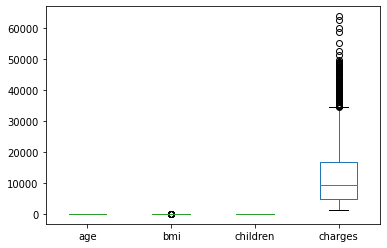

In [6]:
#analysing outliers
df.plot.box()

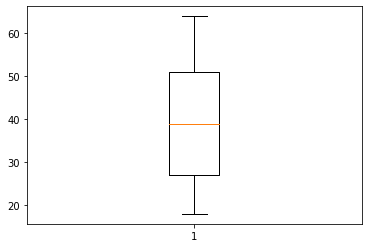

In [7]:
plt.boxplot(df['age'])
plt.show()

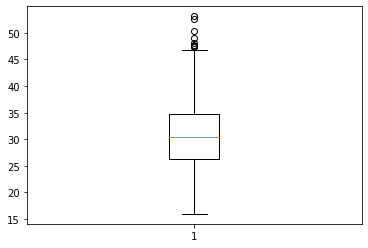

In [8]:
plt.boxplot(df['bmi'])
plt.show()

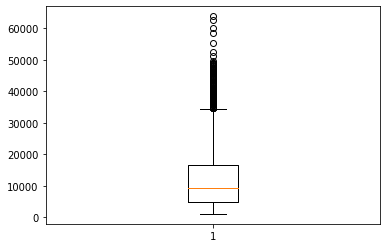

In [9]:
plt.boxplot(df['charges'])
plt.show()

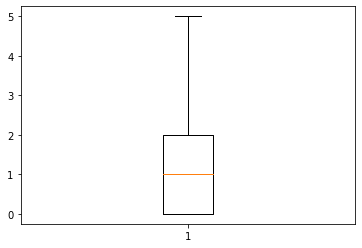

In [10]:
plt.boxplot(df['children'])
plt.show()

In [11]:
#removing outliers by capping and trimming method
Q3 = np.percentile(df['bmi'], 99,
                   interpolation = 'midpoint')

In [12]:
Q3

46.365

In [13]:
print("Highest allowed: ",df['bmi'].mean() + 3*df['bmi'].std())


Highest allowed:  48.95795759602359


In [14]:
df[(df['bmi'] > 48.95)]

,age,sex,bmi,children,smoker,region,charges
116,58,male,49.06,0,no,southeast,11381.3254
847,23,male,50.38,1,no,southeast,2438.0552
1047,22,male,52.58,1,yes,southeast,44501.3982
1317,18,male,53.13,0,no,southeast,1163.4627


In [15]:
new_df = df[(df['bmi'] < 48.95)]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
upper_limit = df['bmi'].mean() + 3*df['bmi'].std()

In [17]:
df['bmi'] = np.where(df['bmi']>upper_limit, upper_limit, df['bmi'])

In [18]:
df["bmi"].describe()

count    1338.000000
mean       30.656433
std         6.075235
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        48.957958
Name: bmi, dtype: float64

In [19]:
print("Highest allowed",df['charges'].mean() + 3*df['charges'].std())

Highest allowed 49600.45597522326


In [20]:
df[(df['charges'] > 49600.45)]

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


In [21]:
new_df2 = df[(df['charges'] < 49600.45)]
new_df2

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
upper_limit = df['charges'].mean() + 3*df['charges'].std()

In [23]:
df['charges'] = np.where(df['charges']>upper_limit, upper_limit, df['charges'])

In [24]:
df["charges"].describe()

count     1338.000000
mean     13228.065484
std      11963.330652
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      49600.455975
Name: charges, dtype: float64

In [25]:
#getting dummy variables of categorical variables
dummy_sex = pd.get_dummies(df.sex , prefix = "sex")
dummy_sex

,sex_female,sex_male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
1333,0,1
1334,1,0
1335,1,0
1336,1,0


In [26]:
df = pd.concat([df, dummy_sex], axis=1)

In [27]:
df.head()

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1


In [28]:
df.drop(["sex", "sex_female"], axis = 1, inplace = True)

In [29]:
df.head()

,age,bmi,children,smoker,region,charges,sex_male
0,19,27.900,0,yes,southwest,16884.92400,0
1,18,33.770,1,no,southeast,1725.55230,1
2,28,33.000,3,no,southeast,4449.46200,1
3,33,22.705,0,no,northwest,21984.47061,1
4,32,28.880,0,no,northwest,3866.85520,1


In [30]:
dummy_smoker = pd.get_dummies(df.smoker , prefix = "smoker")
dummy_smoker

,smoker_no,smoker_yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1333,1,0
1334,1,0
1335,1,0
1336,1,0


In [31]:
df = pd.concat([df, dummy_smoker], axis=1)

In [32]:
df.head()

,age,bmi,children,smoker,region,charges,sex_male,smoker_no,smoker_yes
0,19,27.900,0,yes,southwest,16884.92400,0,0,1
1,18,33.770,1,no,southeast,1725.55230,1,1,0
2,28,33.000,3,no,southeast,4449.46200,1,1,0
3,33,22.705,0,no,northwest,21984.47061,1,1,0
4,32,28.880,0,no,northwest,3866.85520,1,1,0


In [33]:
df.drop(["smoker", "smoker_no"], axis=1, inplace = True)

In [34]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes
0,19,27.900,0,southwest,16884.92400,0,1
1,18,33.770,1,southeast,1725.55230,1,0
2,28,33.000,3,southeast,4449.46200,1,0
3,33,22.705,0,northwest,21984.47061,1,0
4,32,28.880,0,northwest,3866.85520,1,0


In [35]:
dummy_region = pd.get_dummies(df.region , prefix = "region")
dummy_region

,region_northeast,region_northwest,region_southeast,region_southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [36]:
df = pd.concat([df, dummy_region], axis=1)

In [37]:
df.head()

,age,bmi,children,region,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,southwest,16884.92400,0,1,0,0,0,1
1,18,33.770,1,southeast,1725.55230,1,0,0,0,1,0
2,28,33.000,3,southeast,4449.46200,1,0,0,0,1,0
3,33,22.705,0,northwest,21984.47061,1,0,0,1,0,0
4,32,28.880,0,northwest,3866.85520,1,0,0,1,0,0


In [38]:
df.drop(["region", "region_southwest"], axis=1, inplace = True)

In [39]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
0,19,27.900,0,16884.92400,0,1,0,0,0
1,18,33.770,1,1725.55230,1,0,0,0,1
2,28,33.000,3,4449.46200,1,0,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1,0
4,32,28.880,0,3866.85520,1,0,0,1,0


In [40]:
df.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.111191,0.042469,0.301097,-0.020856,-0.025019,0.002475,-0.000407,-0.011642
bmi,0.111191,1.000000,0.013334,0.197109,0.045412,0.003242,-0.138030,-0.135860,0.269169
children,0.042469,0.013334,1.000000,0.069881,0.017163,0.007673,-0.022808,0.024806,-0.023066
charges,0.301097,0.197109,0.069881,1.000000,0.058074,0.789924,0.007120,-0.040713,0.073239
sex_male,-0.020856,0.045412,0.017163,0.058074,1.000000,0.076185,-0.002425,-0.011156,0.017117
smoker_yes,-0.025019,0.003242,0.007673,0.789924,0.076185,1.000000,0.002811,-0.036945,0.068498
region_northeast,0.002475,-0.138030,-0.022808,0.007120,-0.002425,0.002811,1.000000,-0.320177,-0.345561
region_northwest,-0.000407,-0.135860,0.024806,-0.040713,-0.011156,-0.036945,-0.320177,1.000000,-0.346265
region_southeast,-0.011642,0.269169,-0.023066,0.073239,0.017117,0.068498,-0.345561,-0.346265,1.000000


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
#splitting dependent and independent variable
x = df[['age','bmi','children','sex_male','smoker_yes','region_northeast','region_northwest','region_southeast']]
y = df[['charges']]

In [43]:
#splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 5)

In [44]:
linearR = LinearRegression()

In [45]:
#fitting data into model
linearR.fit(x_train, y_train)

LinearRegression()

In [46]:
y_predict = linearR.predict(x_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error

In [48]:
r2 = r2_score(y_test, y_predict)

In [49]:
r2

0.7936064060467556